https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
df['month'].value_counts()

12    31
7     31
5     31
3     31
1     31
11    30
10    30
6     30
4     30
9     28
2     26
8     19
Name: month, dtype: int64

### 2. Lidia con las variables categóricas del dataset

In [4]:
df['week'].value_counts()

Tues     52
Fri      50
Sat      50
Wed      49
Thurs    49
Sun      49
Mon      49
Name: week, dtype: int64

In [5]:
day_week_dummy = pd.get_dummies(df['week'])

In [6]:
df2 = pd.concat([df, day_week_dummy], axis=1)
df2.drop(['week'], axis=1, inplace=True)
df2.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### 3. Divide en train y test

In [7]:
features = list(df2.columns)
features.remove('actual')
target = 'actual'

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target], test_size=.2, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 17)
(70, 17)
(278,)
(70,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
predictions = tree_reg.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error

print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

MSE:  44.82857142857143
RMSE:  6.695414208887411


### 5. Calcula su MAE
Sin usar sklearn

In [26]:
diferencias = np.abs(predictions-y_test)
mae = diferencias.sum()/len(diferencias)
mae

4.885714285714286

In [22]:
y_test

255    66
114    61
314    52
268    66
167    70
       ..
93     68
180    76
183    69
197    78
325    36
Name: actual, Length: 70, dtype: int64

### 6. Calcula su MAPE
Sin usar sklearn

In [23]:
diferencias_pct = np.abs((predictions-y_test)/y_test)
mape = diferencias_pct.sum()/len(diferencias_pct)
mape

0.07703220475099386

### 7. Representa el árbol de decision

In [24]:
import sklearn

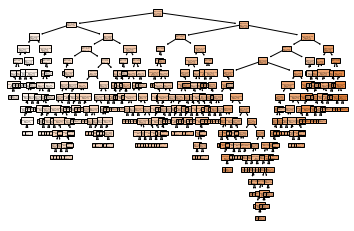

In [25]:
sklearn.tree.plot_tree(tree_reg,
               feature_names=X_train.columns,
               filled = True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [27]:
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [28]:
predictions_depth3 = tree_reg2.predict(X_test)

print('MSE: ', mean_squared_error(y_test, predictions_depth3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions_depth3)))

MSE:  34.11001819765438
RMSE:  5.840378258097191


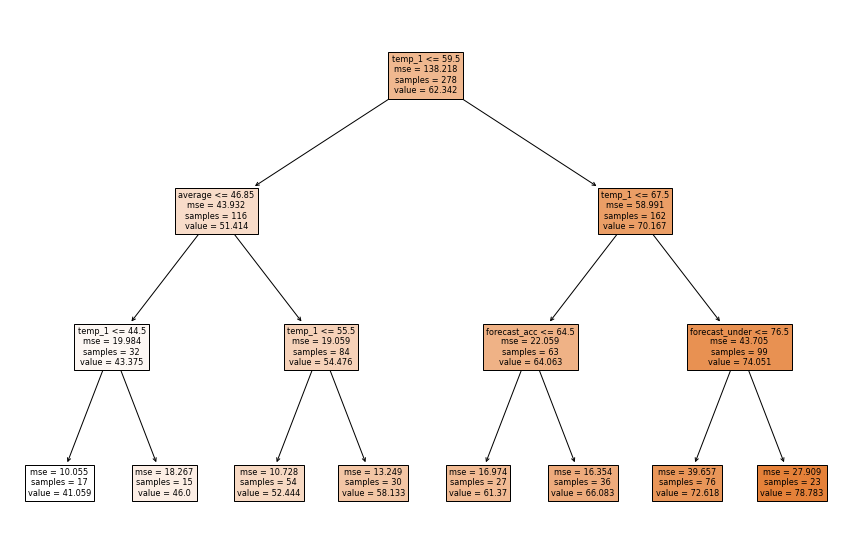

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sklearn.tree.plot_tree(tree_reg2,
               feature_names=X_train.columns,
               filled = True);

### 9. Vuelve a calcular si MAE

In [37]:
diferencias = np.abs(predictions_depth3-y_test)
mae = diferencias.sum()/len(diferencias)
mae

4.5567196265742504

### 10. Vuelve a representar su árbol

In [38]:
# DONE

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [41]:
X_train.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'Fri', 'Mon', 'Sat', 'Sun',
       'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [42]:
tree_reg.feature_importances_

array([0.00000000e+00, 1.56991638e-02, 2.33989980e-02, 1.59043776e-02,
       7.57173025e-01, 9.98110055e-02, 1.65903153e-02, 1.21094137e-02,
       2.28475103e-02, 1.56035192e-02, 3.81700554e-04, 9.05202386e-03,
       2.22427323e-03, 6.41346779e-03, 7.69907367e-04, 4.40256889e-04,
       1.58104170e-03])

In [40]:
tree_reg2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.88020751,
       0.08841159, 0.        , 0.01060993, 0.02077097, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])